In [23]:
import numpy as np
import pandas as pd
#K-means算法的步骤如下：
#从样本中选择k个点作为初始簇中心
#计算每个样本到各个簇中心的距离，将样本划分到距离最近的簇中心所对应的簇中。

In [24]:
data = pd.read_csv(r"order.csv")
t = data.iloc[:,-8:]
# t = np.asarray(t)
# for index ,x in enumerate(t):
#     print(index, x) 

In [25]:
class KMeans:
    '''使用python语言实现聚类方法'''
    def __init__(self,k,times):
        '''初始化方法 
        Parameters 
        -----
        k：int 
            聚类的个数 
        
        times :int
            聚类迭代的次数
        
        '''
        self.k = k
        self.times = times
        
    def fit(self,X):
        '''根据提供的训练数据，对模型进行训练。
        Parameters 
        -----
        X：类数组类型，形状为：[样本数量，特征数量]
            待训练的样本特征属性 
        
        '''
        X = np.asarray(X)
        #设置随机种子，便于可以产生相同的随机序列，意味着随机的结果可以重现
        np.random.seed(0)
        #从数组中随机选择k个点作为初始聚类中心
        self.cluster_centers_ = X[np.random.randint(0,len(X),self.k)]#后面的第三个参数self.k是选取几个点
        self.labels_ = np.zeros(len(X))#用来存放每个点所属的簇
        
        
        for t in range(self.times):
            for index ,x in enumerate(X):#index是行标，x是每一行的数据
                #计算目前这个样本与k个聚类中心的距离数组
                dis = np.sqrt(np.sum((x-self.cluster_centers_)**2,axis=1))
                #将最小距离的索引赋值给标签数组，索引的值就是当前所属的簇，范围是0到k-1
                self.labels_[index] = dis.argmin()#计算最小的距离，并得到，对应的下标值
            
            #循环遍历每一个簇，更新中点
            for i in range(self.k):
                #计算每个簇内所有点的均值，更新簇中心。
                self.cluster_centers_[i] = np.mean(X[self.labels_==i],axis=0)#按列求均值
    
    def predict(self,X):
        '''根据参数传递样本，对样本进行预测。(预测样本处于哪一个簇当中)
        Parameters 
        -----
        X：类数组类型，形状为：[样本数量，特征数量]
            待预测的样本特征属性 
        Returns
        -----
            result:数组类型
                预测结果。每一个X所属的簇 
        '''
        X = np.asarray(X)
        result = np.zeros(len(X))
        for index ,x in enumerate(X):
            #计算样本到每个聚类中心的距离
            dis = np.sqrt(np.sum((x-self.cluster_centers_)**2,axis=1))
            #找到距离最近的聚类中心，划分类别
            result[index] = dis.argmin()
        return result

In [26]:
kmeans = KMeans(k=3,times=50)
kmeans.fit(t)#属于无监督学习，无需传递y

In [27]:
kmeans.cluster_centers_

array([[46.33977936,  8.93380516, 23.19047005, 13.11741633,  4.8107557 ,
         1.17283735,  1.35704647,  0.95392773],
       [19.5308009 , 50.42856608, 14.70652695,  7.89437019,  3.69829234,
         0.91000428,  1.92515077,  0.82113238],
       [ 7.93541008,  4.56182052, 30.65583437, 18.57726789,  8.61597195,
         1.28482514, 26.81950293,  1.30158264]])

In [30]:
#查看某个簇内的所有样本数据
t[kmeans.labels_==1]

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.00
1,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.00
2,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.00
3,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.00
4,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...
29973,17.51,59.08,6.71,0.00,10.39,0.00,0.0,6.31
29975,38.09,56.94,4.96,0.00,0.00,0.00,0.0,0.00
29980,24.12,34.54,26.02,7.38,7.94,0.00,0.0,0.00
29981,19.43,53.57,2.80,7.98,3.57,12.66,0.0,0.00


In [31]:
kmeans.predict([[30,30,40,0,0,0,0,0],[0,0,0,0,0,30,30,40],[30,30,0,0,0,0,0,40]])

array([0., 2., 1.])

In [32]:
#可视化展示
from matplotlib import pyplot as plt
import matplotlib as mpl
#默认情况下不支持中文显示，需要进行设置
#设置黑体，支持中文显示
mpl.rcParams["font.family"] = "SimHei"
#在设置中文字体时，能够正常的显示符号
mpl.rcParams["axes.unicode_minus"] = False

In [33]:
t2 = data.loc[:,"Food%":"Fresh%"]#按标签进行切片，最后一行会包含进去，与按下标切片不同
kmeans = KMeans(3,50)
kmeans.fit(t2)

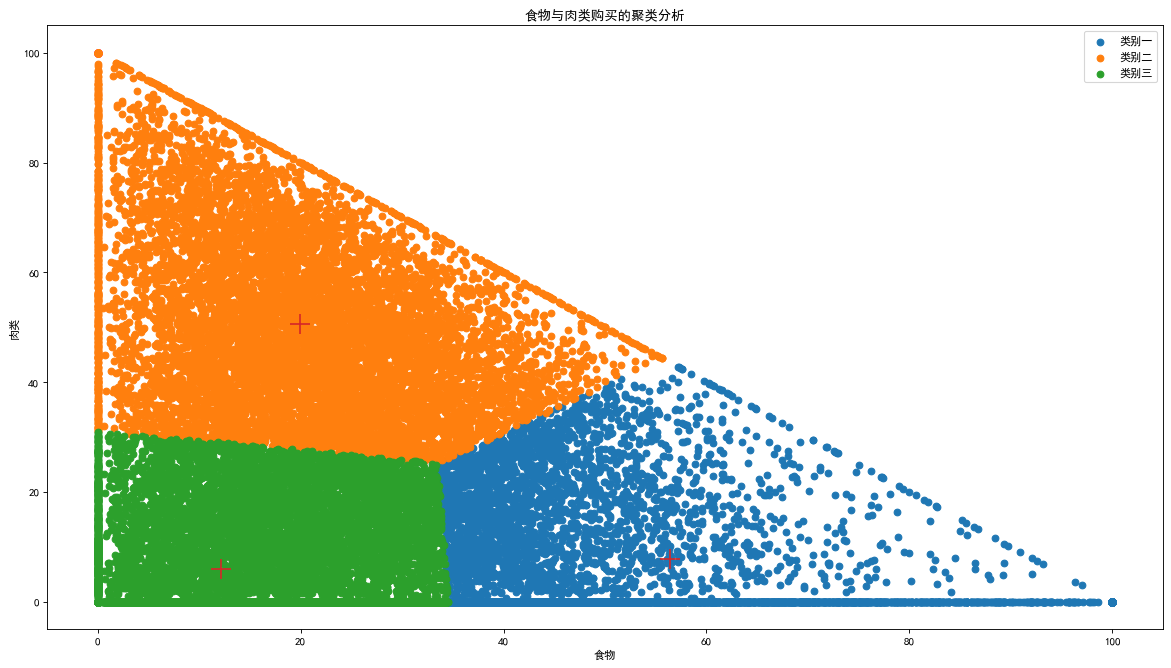

In [37]:
plt.figure(figsize=(18,10),dpi=80)
#绘制每个类别的散点图
plt.scatter(t2[kmeans.labels_==0].iloc[:,0],t2[kmeans.labels_==0].iloc[:,1],label="类别一")
plt.scatter(t2[kmeans.labels_==1].iloc[:,0],t2[kmeans.labels_==1].iloc[:,1],label="类别二")
plt.scatter(t2[kmeans.labels_==2].iloc[:,0],t2[kmeans.labels_==2].iloc[:,1],label="类别三")
#绘制聚类中心
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="+",s=300)
plt.title("食物与肉类购买的聚类分析")
plt.xlabel("食物")
plt.ylabel("肉类")
plt.legend()
plt.show()